In [9]:
from Methods import Methods
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from XGBoost import XGBoostClassifier

In [7]:
df = pd.read_csv("encoded_final.csv")

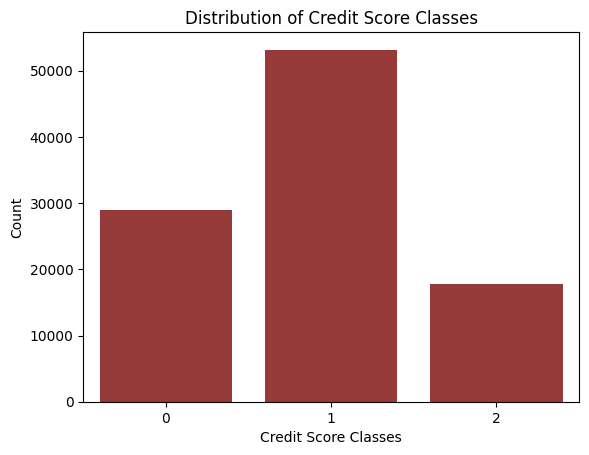

In [12]:
# Class distribution in Target Column "Credit_Score"
single_color = 'brown'
sns.countplot(data=df, x='Credit_Score_encoded', color = single_color)


plt.xlabel('Credit Score Classes')
plt.ylabel('Count')
plt.title('Distribution of Credit Score Classes')

# Show 
plt.show()

# XGBoost with SMOTE to address the imbalance in the target column

In [2]:
X = df.drop(columns = ['Credit_Score_encoded'])
y = df['Credit_Score_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model = XGBoostClassifier(X_train, y_train, X_val, y_val, X_test, y_test)
methods_instance = Methods(model)

# Perform SMOTE balancing
X_train_resampled, y_train_resampled = methods_instance.SMOTE_Balancing(X_train, y_train)

Class Distribution Before SMOTE:
{0: 23124, 1: 42575, 2: 14301}

Class Distribution After SMOTE:
{0: 42575, 1: 42575, 2: 42575}


In [3]:
xgb_classifier = XGBoostClassifier(X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

In [4]:
# Train a classic XGBoost model
classic_xgb = xgb_classifier.XGBoost_Classic()

XGBoost Classifier's validation accuracy is 0.7658
----------------------------------------------------------------------
XGBoost Classifier's validation classification report is:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      2894
           1       0.83      0.73      0.78      5317
           2       0.65      0.81      0.72      1789

    accuracy                           0.77     10000
   macro avg       0.74      0.78      0.76     10000
weighted avg       0.78      0.77      0.77     10000

XGBoost Classifier's testing accuracy is 0.7709
----------------------------------------------------------------------
XGBoost Classifier's testing classification report is:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2980
           1       0.83      0.74      0.78      5282
           2       0.65      0.82      0.72      1738

    accuracy                           0.77    

In [5]:
# Train an XGBoost model with GridSearchCV
grid_search_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [1, 3],
    'gamma': [0.0, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}
best_xgb_grid_search, best_params_grid_search = xgb_classifier.XGBoost_GridSearchCV(grid_search_params, cv=5)

XGBoost Classifier's validation accuracy (GridSearchCV) is 0.81
----------------------------------------------------------------------
XGBoost Classifier's validation classification report (GridSearchCV) is:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      2894
           1       0.84      0.79      0.82      5317
           2       0.75      0.81      0.78      1789

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.81      0.81      0.81     10000

XGBoost Classifier's testing accuracy (GridSearchCV) is 0.8119
----------------------------------------------------------------------
XGBoost Classifier's testing classification report (GridSearchCV) is:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2980
           1       0.85      0.80      0.82      5282
           2       0.74      0.80      0.77 

In [6]:
print(best_params_grid_search)

{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


In [24]:
random_search_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [1, 3],
    'gamma': [0.0, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Call the Random_Search method and pass the model as an argument
best_random_search_model, best_random_search_params = xgb_classifier.XGBoost_RandomizedSearchCV(params=random_search_params, cv=5)
print("Best parameters from random search:", best_random_search_params)

XGBoost Classifier's validation accuracy (RandomizedSearchCV) is 0.8077
----------------------------------------------------------------------
XGBoost Classifier's validation classification report (RandomizedSearchCV) is:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      2894
           1       0.84      0.79      0.82      5317
           2       0.75      0.80      0.77      1789

    accuracy                           0.81     10000
   macro avg       0.79      0.81      0.80     10000
weighted avg       0.81      0.81      0.81     10000

XGBoost Classifier's testing accuracy (RandomizedSearchCV) is 0.8114
----------------------------------------------------------------------
XGBoost Classifier's testing classification report (RandomizedSearchCV) is:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2980
           1       0.84      0.80      0.82      5282
           2      

# PCA

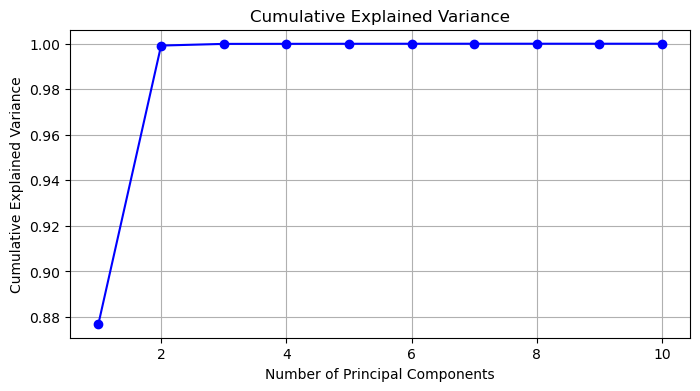

Validation Accuracy with Extracted Features: 0.7721
----------------------------------------------------------------------
Validation classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.78      0.77      0.78      2894
           1       0.77      0.82      0.80      5317
           2       0.75      0.64      0.69      1789

    accuracy                           0.77     10000
   macro avg       0.77      0.74      0.75     10000
weighted avg       0.77      0.77      0.77     10000

Test Accuracy with Extracted Features: 0.7741
----------------------------------------------------------------------
Test classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.78      0.77      0.78      2980
           1       0.77      0.82      0.79      5282
           2       0.77      0.64      0.70      1738

    accuracy                           0.77     100

In [34]:
methods_instance = Methods(best_random_search_model)

# Define the number of components for PCA
num_components = 10 

# Perform PCA
model_pca_trained, pca_model, X_train_pca, X_val_pca, X_test_pca = methods_instance.perform_Pca(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    X_test=X_test,
    y_test=y_test,
    num_components=num_components,
    plot_variance=True  # Set to True to plot explained variance ratio
)

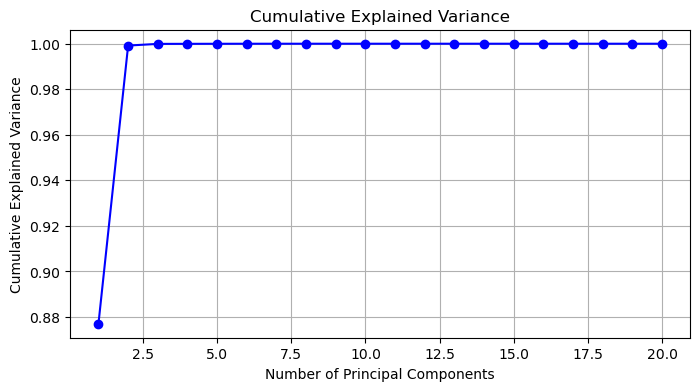

Validation Accuracy with Extracted Features: 0.791
----------------------------------------------------------------------
Validation classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.80      0.79      0.79      2894
           1       0.79      0.83      0.81      5317
           2       0.77      0.69      0.73      1789

    accuracy                           0.79     10000
   macro avg       0.79      0.77      0.78     10000
weighted avg       0.79      0.79      0.79     10000

Test Accuracy with Extracted Features: 0.795
----------------------------------------------------------------------
Test classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.80      0.79      0.79      2980
           1       0.79      0.83      0.81      5282
           2       0.78      0.70      0.74      1738

    accuracy                           0.80     10000

In [36]:
# Define the number of components for PCA
num_components = 20

# Perform PCA
model_pca_trained3, pca_model3, X_train_pca3, X_val_pca3, X_test_pca3 = methods_instance.perform_Pca(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    X_test=X_test,
    y_test=y_test,
    num_components=num_components,
    plot_variance=True  # Set to True to plot explained variance ratio
)

Round 10: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Amount_invested_monthly

Round 9: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Num_Bank_Accounts

Round 8: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Age

Round 7: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Num_Cr

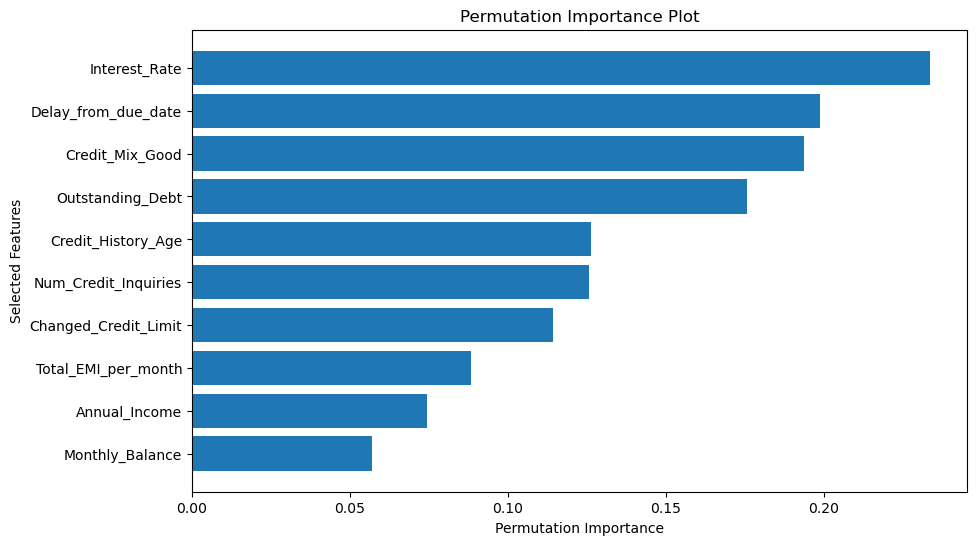

RFE Model: RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
Trained Model with RFE: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


In [37]:
methods_instance = Methods(best_random_search_model)

# Define the number of features to keep
num_features_to_keep = 10

# Call the rfe_Random_Forest method on your instance
rfe_model, model_rfe_trained, X_train_rfe, X_val_rfe, X_test_rfe = methods_instance.rfe_Random_Forest(
    num_features_to_keep=num_features_to_keep,
    X_train=X_train_resampled,
    y_train=y_train_resampled,
    X_val=X_val,
    y_val=y_val,
    X_test=X_test,
    y_test=y_test
)

# Print or use the returned variables as needed
print("RFE Model:", rfe_model)
print("Trained Model with RFE:", model_rfe_trained)

Round 15: Selected features - Customer_ID, Annual_Income, Monthly_Inhand_Salary, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good, Credit_Mix_Standard
Eliminated feature: Payday Loan

Round 14: Selected features - Customer_ID, Annual_Income, Monthly_Inhand_Salary, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good, Credit_Mix_Standard
Eliminated feature: Mortgage Loan

Round 13: Selected features - Customer_ID, Annual_Income, Monthly_Inhand_Salary, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balanc

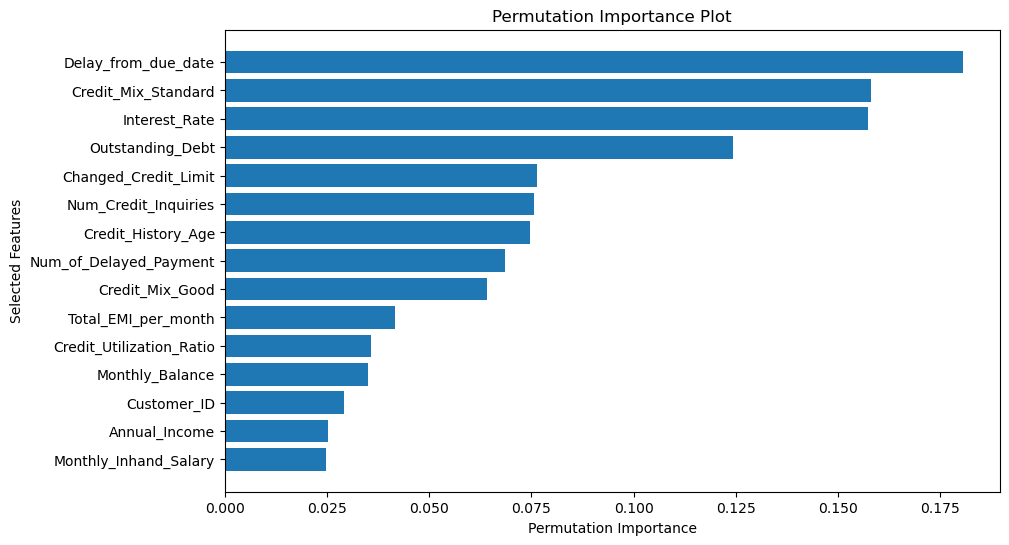

RFE Model: RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)
Trained Model with RFE: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


In [39]:
methods_instance = Methods(best_random_search_model)

# Define the number of features to keep
num_features_to_keep = 15

# Call the rfe_Random_Forest method on your instance
rfe_model3, model_rfe_trained3, X_train_rfe3, X_val_rfe3, X_test_rfe3 = methods_instance.rfe_Random_Forest(
    num_features_to_keep=num_features_to_keep,
    X_train=X_train_resampled,
    y_train=y_train_resampled,
    X_val=X_val,
    y_val=y_val,
    X_test=X_test,
    y_test=y_test
)

# Print or use the returned variables as needed
print("RFE Model:", rfe_model3)
print("Trained Model with RFE:", model_rfe_trained3)